# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/willmayer/Desktop/DS3001/ds3001-the_bootstrap/data/mammogram.csv')

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?

In [13]:
x = pd.crosstab(df['treatment'], df['breast_cancer_death'])
x

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


In [ ]:
pd.crosstab(df['treatment'], df['breast_cancer_death'], normalize=True)

breast_cancer_death,no,yes
treatment,,
control,0.494295,0.005621
mammogram,0.494518,0.005566


In [17]:
effect = 44425 / 44925 - 44405/44910
effect

0.00011505110015985753

2. Bootstrap the densities and distributions of survival rates for the two groups. 

In [19]:
def survive(x):
    return 1 if x == 'no' else 0
df['survive'] = df['breast_cancer_death'].apply(survive)

def treated(x):
    return 1 if x == 'mammogram' else 0
df['treat'] = df['treatment'].apply(treated)

In [20]:
treat = df.loc[df['treat'] == 1]
control = df.loc[df['treat'] == 0]

In [22]:
S = 5000
fx = []
for i in range(S):
    treat_t = treat.sample( treat.shape[0], axis=0, replace=True)
    control_t = control.sample( control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(treat_t['survive']) - np.mean(control_t['survive'])
    fx.append(treatment_effect_t)

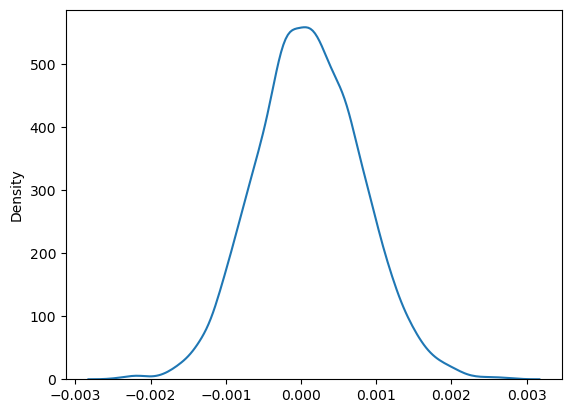

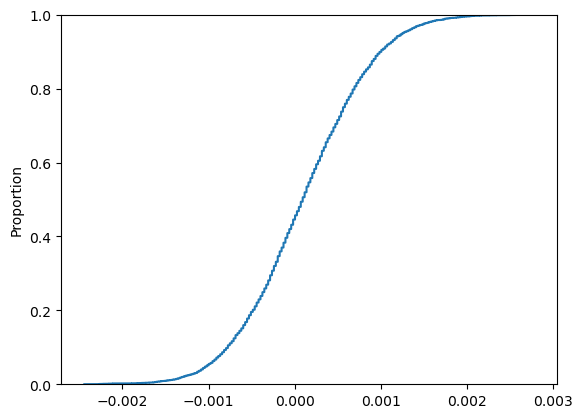

In [23]:
sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?


In [24]:
low = np.quantile(fx, 0.005)
high = np.quantile(fx, 0.995)
print("99% confidence interval: (", low, ', ', high, ') ') 

99% confidence interval: ( -0.0016436144780749985 ,  0.001985177477938697 ) 


The 99% confidence interval includes zero, implying that the treatment is not statistically significant at the 99% level, or that there is a >1% probability that the difference in survival is a result of chance, not the effect of treatment

4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

First, I'm curious if there could be a third variable at play where women who are more likely to get mammograms are also more likely to develop terminal breast cancer. I'm curious whether participants were randomly assigned to treatment or if this is a correlational study. I'm also curious whether the effect of getting a mammogram is different for different types of people---I can imagine that access to quality health resources intersects significantly with one's ability to reduce their likelihood of death upon receiving a negative mammogram. Mammograms could also be more or less effective for different groups of people

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.


In [25]:
df = pd.read_csv('/Users/willmayer/Desktop/DS3001/ds3001-the_bootstrap/data/diabetes_hw.csv')

1. Cross tabulate `treatment` and `outcome`.


In [27]:
x = pd.crosstab(df['treatment'], df['outcome'])
x

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?


In [28]:
def success(x):
    return 1 if x == 'success' else 0
df['success'] = df['outcome'].apply(success)

In [31]:
lifestyle = df.loc[df['treatment'] == 'lifestyle']
print(len(lifestyle.loc[lifestyle['success']==1]) / len(lifestyle))
met = df.loc[df['treatment'] == 'met']
print(len(met.loc[met['success']==1]) / len(met))
rosi = df.loc[df['treatment'] == 'rosi']
print(len(rosi.loc[rosi['success']==1]) / len(rosi))


0.5341880341880342
0.4827586206896552
0.6137339055793991


Ranked in order of success rate:
1. Rosi
2. Lifestyle
3. Met

3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?


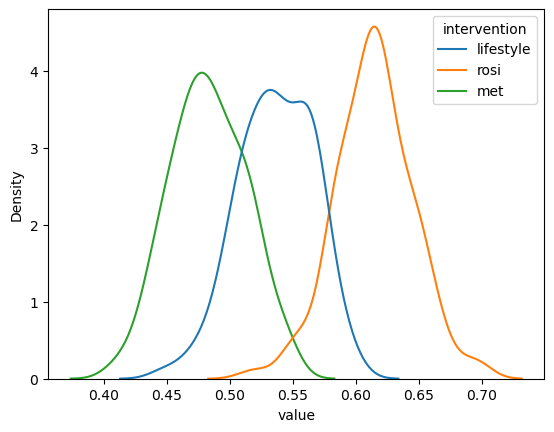

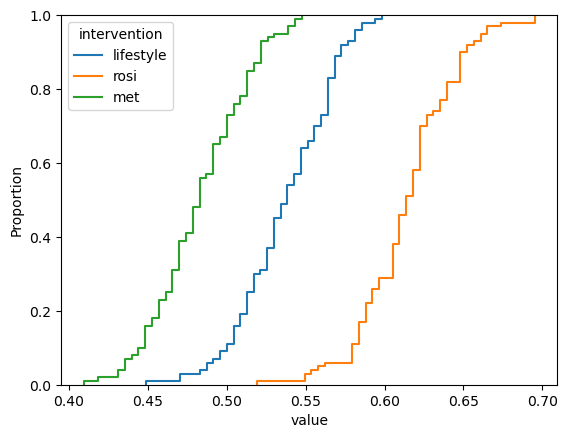

In [32]:
S = 100
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    lif_t = lifestyle.sample( lifestyle.shape[0], axis=0, replace=True)
    ros_t = rosi.sample( rosi.shape[0], axis=0, replace=True)
    met_t = met.sample( met.shape[0], axis=0, replace=True)
    #
    fx_lif_t = np.mean(lif_t['success'])
    fx_ros_t = np.mean(ros_t['success'])
    fx_met_t = np.mean(met_t['success'])
    #
    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)    

gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'}) 
gdf_ros = pd.DataFrame({'value':fx_ros, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()


The results of the bootstrap were the same as the initial impression. Rosi is the most effective, then lifestyle, then met. This reduces the chance that our conclusions were a result of chance

4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?


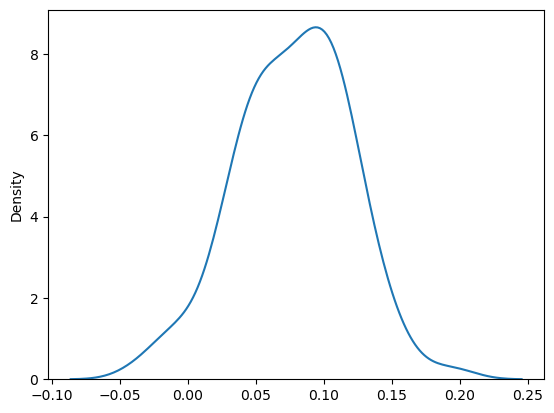

90% Confidence interval, rosi minus lifestyle:  0.01025549319540738 ,  0.13948772972378126


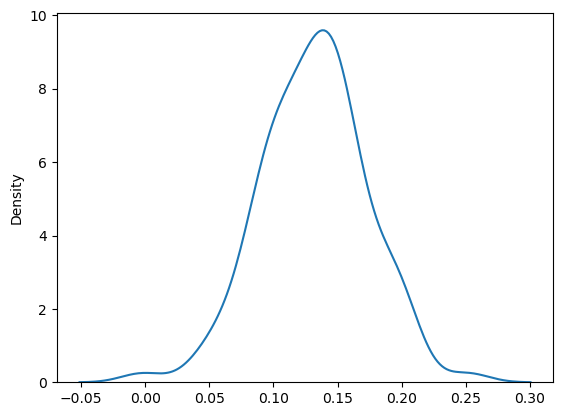

90% Confidence interval, rosi minus metformin:  0.0662118913719106 ,  0.19548986236495486


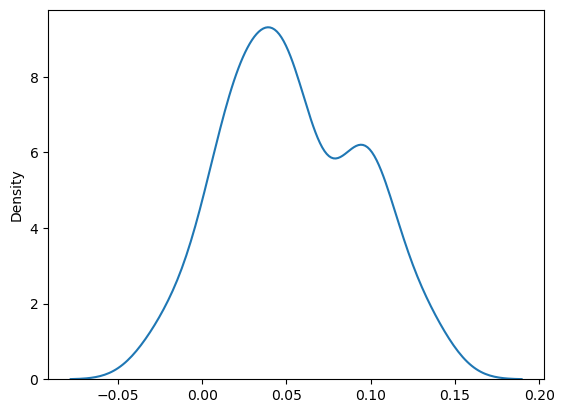

90% Confidence interval, lifestyle minus metformin:  -0.008657530209254416 ,  0.12440870910698494


In [33]:
rosi_versus_lifestyle = np.array(fx_ros)-np.array(fx_lif)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.show()
print('90% Confidence interval, rosi minus lifestyle: ', np.quantile(rosi_versus_lifestyle,.05), ', ', np.quantile(rosi_versus_lifestyle,.95))

rosi_versus_met = np.array(fx_ros)-np.array(fx_met)
sns.kdeplot(x=rosi_versus_met)
plt.show()
print('90% Confidence interval, rosi minus metformin: ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

lif_versus_met = np.array(fx_lif)-np.array(fx_met)
sns.kdeplot(x=lif_versus_met)
plt.show()
print('90% Confidence interval, lifestyle minus metformin: ', np.quantile(lif_versus_met,.05), ', ', np.quantile(lif_versus_met,.95))


At the 90% level, there is a statistically significant difference in outcomes for rosi patients compared to both alternative treatments. There is no statistically significant difference of outcomes between lifestyle and metformin treatments as the CI includes zero, meaning there is at least a 10% chance the difference in outcomes is a result of random chance.

5. Which treatment appears to be the most effective overall?


There's a statistically significant improvement in outcomes for rosi treatments compared to lifestyle and metformin, so this model would suggest that rosi is the most effective overall. But who knows about what other impacts the different treatments might have on lifestyle and general health outcomes. Strictly comparing 'success' outcomes (whatever that means), one treatment stands out, but this is a better conversation to have with a doctor! 

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?